In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, auc, roc_curve, classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPClassifier
import time

## Khảo sát dữ liệu

- Bộ dữ liệu: Hotel Booking Demand
- Nguồn: https://www.kaggle.com/datasets/jessemostipak/hotel-booking-demand

In [ ]:
hotel_bookings = pd.read_csv("/content/drive/MyDrive/hotel_bookings.csv", thousands = ',')
hotel_bookings.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,No Deposit,NaN,NaN,0,Transient,107.0,0,0,Check-Out,2015-07-03
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,No Deposit,303.0,NaN,0,Transient,103.0,0,1,Check-Out,2015-07-03
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,2015-05-06
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,No Deposit,15.0,NaN,0,Transient,105.5,0,0,Canceled,2015-04-22


In [ ]:
hotel_bookings[['is_canceled']].value_counts(normalize = True)

is_canceled
0              0.629584
1              0.370416
dtype: float64

=> Bộ dữ liệu bị mất cân bằng

In [ ]:
hotel_bookings.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [ ]:
hotel_bookings.shape

(119390, 32)

In [ ]:
hotel_bookings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
hotel_bookings.isnull().sum()/hotel_bookings.shape[0]

hotel                             0.000000
is_canceled                       0.000000
lead_time                         0.000000
arrival_date_year                 0.000000
arrival_date_month                0.000000
arrival_date_week_number          0.000000
arrival_date_day_of_month         0.000000
stays_in_weekend_nights           0.000000
stays_in_week_nights              0.000000
adults                            0.000000
children                          0.000034
babies                            0.000000
meal                              0.000000
country                           0.004087
market_segment                    0.000000
distribution_channel              0.000000
is_repeated_guest                 0.000000
previous_cancellations            0.000000
previous_bookings_not_canceled    0.000000
reserved_room_type                0.000000
assigned_room_type                0.000000
booking_changes                   0.000000
deposit_type                      0.000000
agent      

In [ ]:
plot_cols = ['lead_time', 'stays_in_week_nights', 'stays_in_weekend_nights', 'adults', 'children', 'babies', 'is_repeated_guest', 
            'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'days_in_waiting_list', 'adr', 
            'required_car_parking_spaces', 'total_of_special_requests']
data_histplot = hotel_bookings[plot_cols]

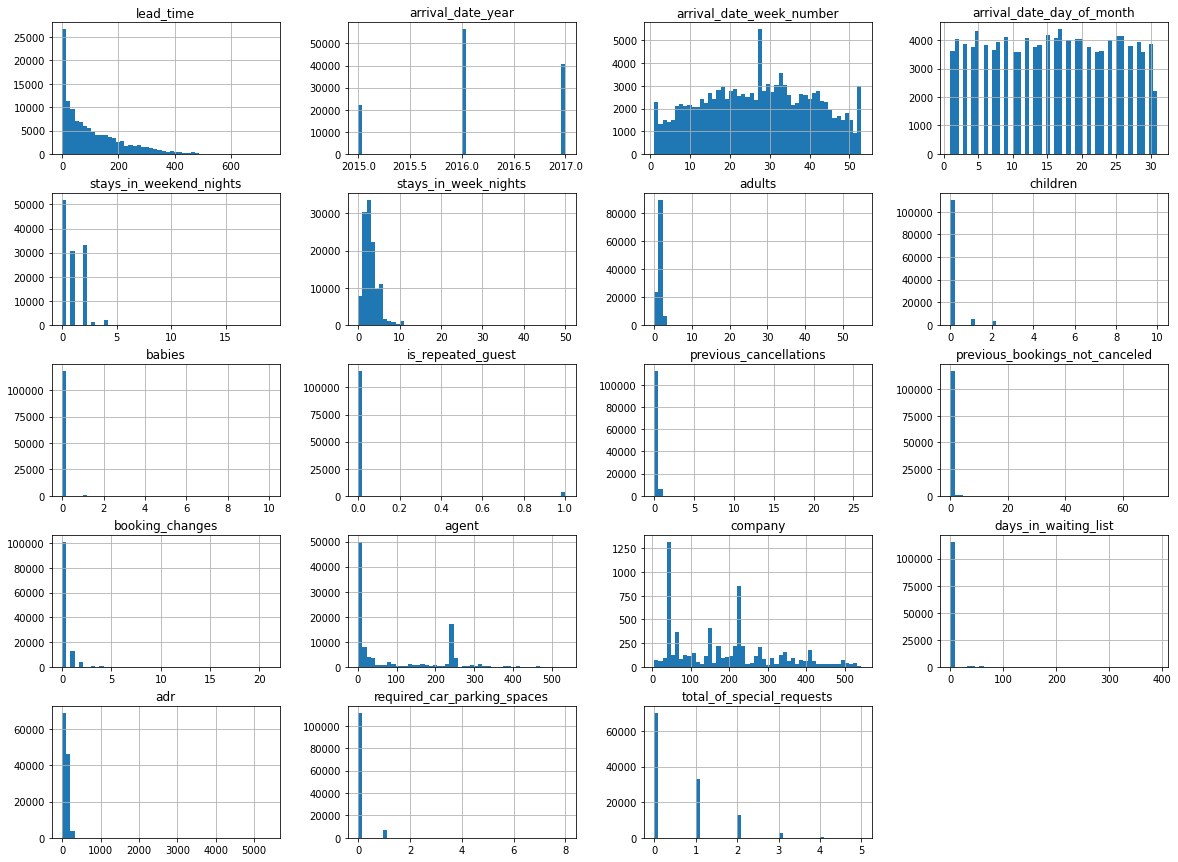

In [ ]:
# Vẽ biểu đồ histogram các thuộc tính kiểu numeric

hotel_bookings.drop('is_canceled', axis = 1).hist(bins = 50, figsize=(20, 15))
plt.show()

## Làm sạch dữ liệu

In [ ]:
# Loai bo lượt book không có khách hàng
omit_index = hotel_bookings.loc[hotel_bookings['adults'] + hotel_bookings['children'] + hotel_bookings['babies'] == 0].index
#hotel_bookings.loc[omit_index, ['adults', 'children', 'babies']]
hotel_bookings.drop(hotel_bookings.index[list(omit_index)], inplace = True)
hotel_bookings.shape

(119210, 32)

In [ ]:
# Xử lý missing value
# Loại bỏ hàng có thuộc tính children null
hotel_bookings.dropna(subset = ['children'], inplace=True)
# Điển cột country: unknown
hotel_bookings['country'] = hotel_bookings['country'].fillna('Unknown')
# Điền cột agent: Giá trị missing có thể do khách du lịch không đăng ký thông qua agent
hotel_bookings['agent'] = hotel_bookings['agent'].fillna(0)
# Điền cột company: Giá trị missing có thể do khách du lịch không đăng ký thông qua company
hotel_bookings['company'] = hotel_bookings['company'].fillna(0)
# Kiểm tra xem data còn giá trị null không?
hotel_bookings.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [ ]:
# Kiểm tra kiểu dữ liệu của từng cột
# Đổi 'children' sang int64 và đổi 'reservation_status_date' sang datetime

hotel_bookings['children'] = hotel_bookings['children'].astype(int)
hotel_bookings['reservation_status_date'] = pd.to_datetime(hotel_bookings['reservation_status_date'])

In [ ]:
# Kết hợp các thuộc tính

# Kết hợp 'arrival_date_year', 'arrival_date_month' và 'arrival_date_day_of_month' thành 'arrival_date'
hotel_bookings['arrival_date'] = hotel_bookings['arrival_date_year'].astype(str) + "-" + hotel_bookings['arrival_date_month'].astype(str) + "-" + hotel_bookings['arrival_date_day_of_month'].astype(str)
hotel_bookings['arrival_date'] = pd.to_datetime(hotel_bookings['arrival_date'], format = "%Y-%B-%d")

# Tính khoảng cách giữa 'arrival_date' và 'reservation_status_date'
hotel_bookings['status_minus_arrival_date'] = np.abs(hotel_bookings['reservation_status_date'] - hotel_bookings['arrival_date']).astype(str)
def format_length(date):
  return date[0]
hotel_bookings['status_minus_arrival_date'] = hotel_bookings['status_minus_arrival_date'].map(format_length).astype(int)

# Kết hợp 'adults', 'children' và 'babies' thành 'total_guests'
hotel_bookings['total_guests'] = hotel_bookings['adults'] + hotel_bookings['children'] + hotel_bookings['babies']

# Tạo thuộc tính mới: price_per_guest
hotel_bookings['price_per_guest'] = hotel_bookings['adr']/hotel_bookings['total_guests']

In [ ]:
hotel_bookings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119206 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119206 non-null  object        
 1   is_canceled                     119206 non-null  int64         
 2   lead_time                       119206 non-null  int64         
 3   arrival_date_year               119206 non-null  int64         
 4   arrival_date_month              119206 non-null  object        
 5   arrival_date_week_number        119206 non-null  int64         
 6   arrival_date_day_of_month       119206 non-null  int64         
 7   stays_in_weekend_nights         119206 non-null  int64         
 8   stays_in_week_nights            119206 non-null  int64         
 9   adults                          119206 non-null  int64         
 10  children                        119206 non-null  int64  

## Phân tích dữ liệu

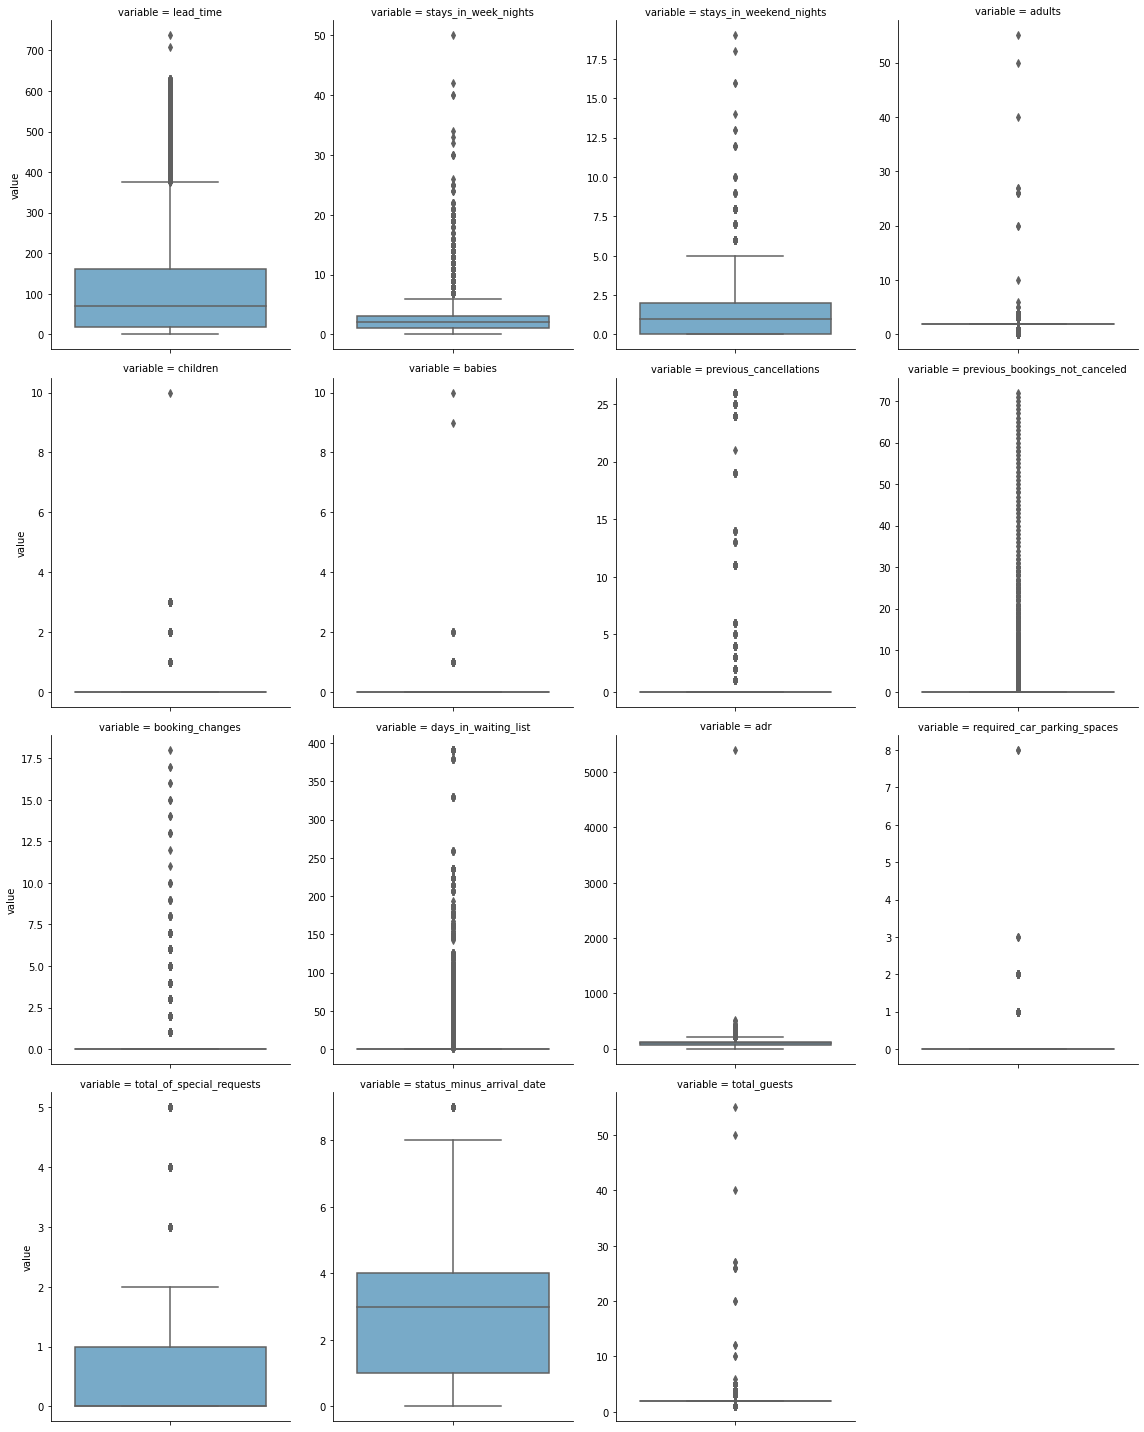

In [ ]:
num_var = ['lead_time', 'stays_in_week_nights', 'stays_in_weekend_nights', 'adults', 'children', 'babies', 
            'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'days_in_waiting_list', 'adr', 
            'required_car_parking_spaces', 'total_of_special_requests', 'status_minus_arrival_date', 'total_guests']
sns.catplot(col = "variable", y = "value", data = pd.melt(hotel_bookings[num_var]), 
            kind = 'box', col_wrap = 4, sharey = False, palette = 'Blues', height = 5, aspect = .8)

(23.0, 1.0)

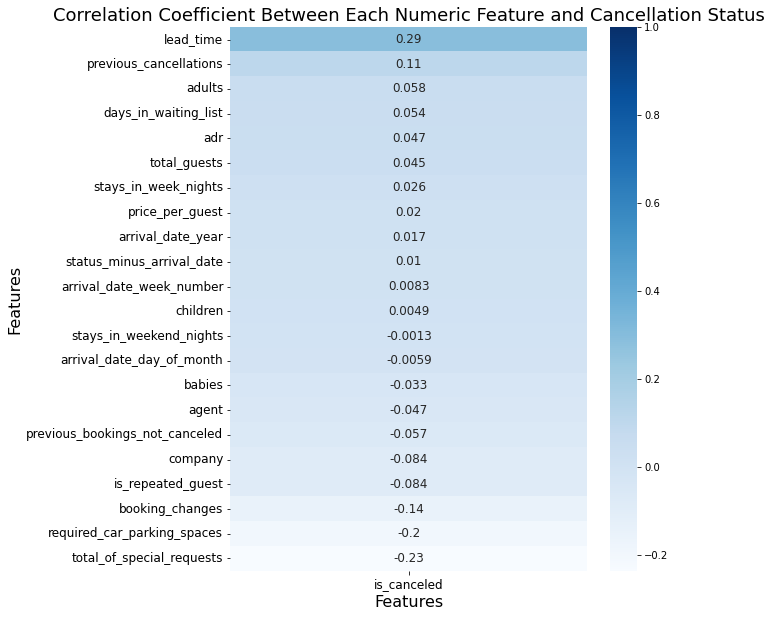

In [ ]:
fig = plt.figure(figsize=(8,10))
ax = sns.heatmap(hotel_bookings.corr()[['is_canceled']].sort_values('is_canceled', ascending=False), 
                 annot = True, annot_kws = {"size":12}, cmap='Blues')
ax.set_title('Correlation Coefficient Between Each Numeric Feature and Cancellation Status', fontsize=18)
ax.set_xlabel('Features', fontsize = 16)
ax.set_ylabel('Features', fontsize = 16)
ax.tick_params(axis = "both", labelsize = 12);
y_min, y_max = ax.get_ylim()
ax.set_ylim(top=y_max+1)

In [ ]:
hotel_bookings.corr()['is_canceled'].abs().sort_values(ascending = False)

is_canceled                       1.000000
lead_time                         0.292930
total_of_special_requests         0.234925
required_car_parking_spaces       0.195696
booking_changes                   0.144821
previous_cancellations            0.110147
is_repeated_guest                 0.083740
company                           0.083588
adults                            0.058155
previous_bookings_not_canceled    0.057363
days_in_waiting_list              0.054309
agent                             0.046743
adr                               0.046558
total_guests                      0.044811
babies                            0.032566
stays_in_week_nights              0.025549
price_per_guest                   0.019591
arrival_date_year                 0.016694
status_minus_arrival_date         0.010446
arrival_date_week_number          0.008299
arrival_date_day_of_month         0.005902
children                          0.004862
stays_in_weekend_nights           0.001316
Name: is_ca

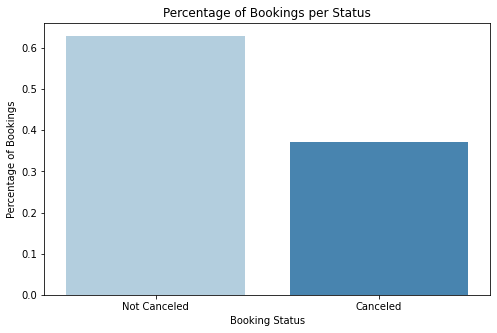

In [ ]:
# So sánh tỉ lệ hủy bookings và không hủy bookings

plt.figure(figsize=(8,5)) 
plt.title("Percentage of Bookings per Status")
sns.barplot(x = hotel_bookings['is_canceled'].unique(), y = hotel_bookings['is_canceled'].value_counts(normalize=True), palette = 'Blues')
plt.xlabel("Booking Status")
plt.ylabel("Percentage of Bookings")
plt.xticks(ticks=[0, 1], labels=['Not Canceled', 'Canceled']);

**Nhận xét**: Tỉ lệ hủy đặt phòng là 37%

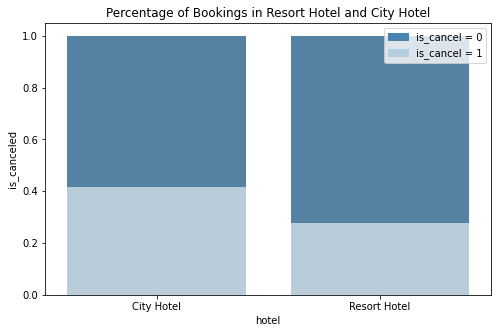

In [ ]:
plt.figure(figsize = (8, 5))
plt.title('Percentage of Bookings in Resort Hotel and City Hotel')

total = hotel_bookings.groupby('hotel')['is_canceled'].count().reset_index()
canceled = hotel_bookings[hotel_bookings['is_canceled'] == 1].groupby('hotel')['is_canceled'].count().reset_index()

canceled['is_canceled'] = canceled['is_canceled']/total['is_canceled']
total['is_canceled'] = total['is_canceled']/total['is_canceled']

sns.barplot(x = 'hotel', y = 'is_canceled', data = total, color = '#4884af')
sns.barplot(x = 'hotel', y = 'is_canceled', data = canceled, color = '#b3cede')

top_bar = mpatches.Patch(color = '#4884af', label = 'is_cancel = 0' )
bottom_bar = mpatches.Patch(color = '#b3cede', label = 'is_cancel = 1')
plt.legend(handles=[top_bar, bottom_bar])

**Nhận xét:** Tỉ lệ hủy đặt phòng ở City Hotel cao hơn so với ở Resort Hotel. Có thể là do phí đặt phòng ở Resort cao hơn hoặc chất lượng dịch vụ ở Resort cao hơn nên ít người hủy đặt phòng hơn.

Text(0, 0.5, 'Percentage of Bookings')

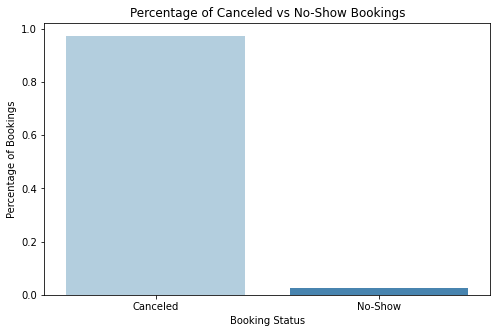

In [ ]:
# Trực quan hóa tỉ lệ hủy booking trước khi nhận phòng

plt.figure(figsize = (8, 5))
plt.title('Percentage of Canceled vs No-Show Bookings')
plt_data = hotel_bookings[hotel_bookings['is_canceled'] == 1]['reservation_status']
sns.barplot(x = plt_data.unique(), y = plt_data.value_counts(normalize = True), palette = 'Blues')
plt.xlabel("Booking Status")
plt.ylabel('Percentage of Bookings')

In [ ]:
plt_data.value_counts(normalize = True)

Canceled    0.972712
No-Show     0.027288
Name: reservation_status, dtype: float64

**Nhận xét**: Phần lớn khách hàng (97%) hủy đặt phòng trước khi nhận phòng

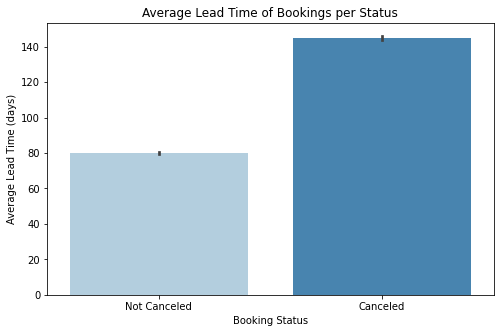

In [ ]:
# lead_time vs is_canceled

plt.figure(figsize = (8, 5)) 
plt.title("Average Lead Time of Bookings per Status")
sns.barplot(x = hotel_bookings['is_canceled'], y = hotel_bookings['lead_time'], palette = 'Blues')
plt.xlabel("Booking Status")
plt.ylabel("Average Lead Time (days)")
plt.xticks(ticks = [0, 1], labels = ['Not Canceled', 'Canceled']);

([<matplotlib.axis.XTick at 0x7fa135f7d7d0>,
 [Text(0, 0, 'Not Canceled'), Text(0, 0, 'Canceled')])

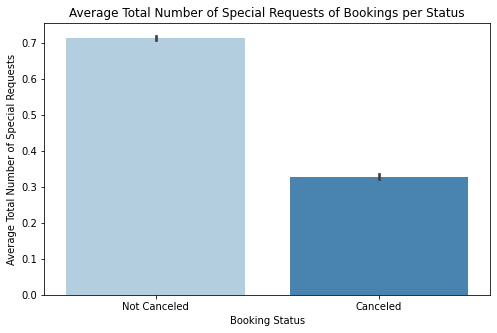

In [ ]:
# total_of_special_requests vs is_canceled

plt.figure(figsize=(8,5)) 
plt.title("Average Total Number of Special Requests of Bookings per Status")
sns.barplot(x=hotel_bookings['is_canceled'], y=hotel_bookings['total_of_special_requests'], palette='Blues')
plt.xlabel("Booking Status")
plt.ylabel("Average Total Number of Special Requests")
plt.xticks(ticks=[0, 1], labels=['Not Canceled', 'Canceled'])

([<matplotlib.axis.XTick at 0x7fa137261650>,
 [Text(0, 0, 'Not Canceled'), Text(0, 0, 'Canceled')])

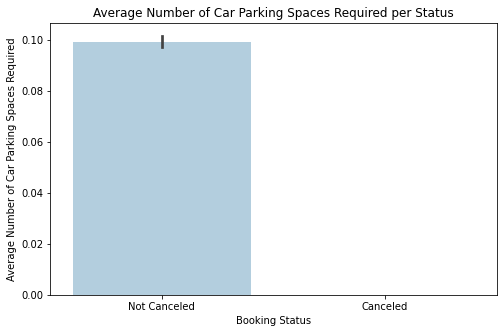

In [ ]:
# required_car_parking_space vs is_canceled
plt.figure(figsize=(8,5)) 
plt.title("Average Number of Car Parking Spaces Required per Status")
sns.barplot(x=hotel_bookings['is_canceled'], y=hotel_bookings['required_car_parking_spaces'], palette='Blues')
plt.xlabel("Booking Status")
plt.ylabel("Average Number of Car Parking Spaces Required")
plt.xticks(ticks=[0, 1], labels=['Not Canceled', 'Canceled'])

([<matplotlib.axis.XTick at 0x7fa1371d7350>,
 [Text(0, 0, 'Not Canceled'), Text(0, 0, 'Canceled')])

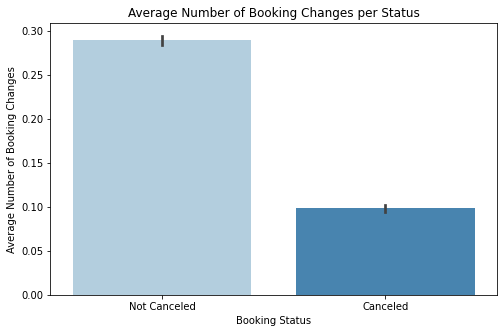

In [ ]:
# booking_changes vs is_canceled
plt.figure(figsize=(8,5)) 
plt.title("Average Number of Booking Changes per Status")
sns.barplot(x=hotel_bookings['is_canceled'], y=hotel_bookings['booking_changes'], palette='Blues')
plt.xlabel("Booking Status")
plt.ylabel("Average Number of Booking Changes")
plt.xticks(ticks=[0, 1], labels=['Not Canceled', 'Canceled'])

Text(0, 0.5, 'Percentage of Bookings Canceled')

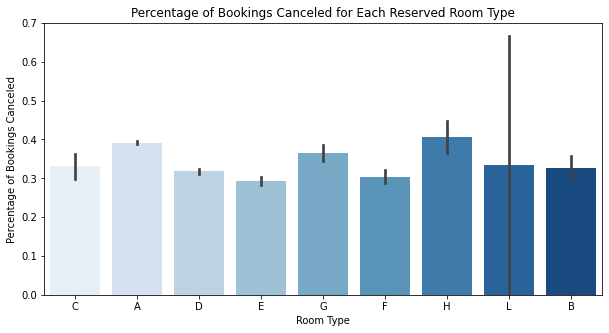

In [ ]:
# Visualizing percentage of bookings canceled for each room type:
plt.figure(figsize=(10,5)) 
plt.title("Percentage of Bookings Canceled for Each Reserved Room Type")
sns.barplot(x=hotel_bookings['reserved_room_type'], y=hotel_bookings['is_canceled'], palette='Blues')
plt.xlabel("Room Type")
plt.ylabel("Percentage of Bookings Canceled")

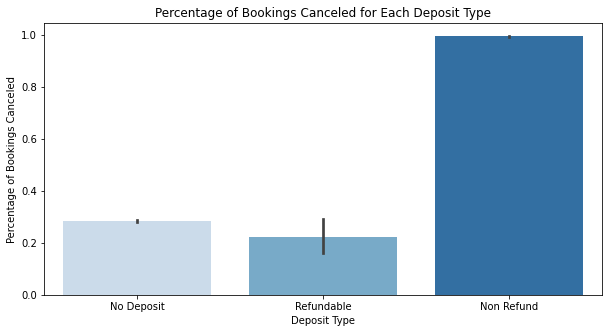

In [ ]:
plt.figure(figsize=(10,5)) 
plt.title("Percentage of Bookings Canceled for Each Deposit Type")
sns.barplot(x=hotel_bookings['deposit_type'], y=hotel_bookings['is_canceled'], palette='Blues')
plt.xlabel("Deposit Type")
plt.ylabel("Percentage of Bookings Canceled");

Text(0, 0.5, 'Percentage of Bookings Canceled')

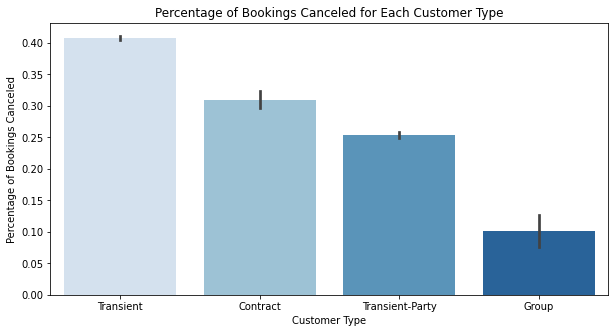

In [ ]:
plt.figure(figsize=(10,5)) 
plt.title("Percentage of Bookings Canceled for Each Customer Type")
sns.barplot(x=hotel_bookings['customer_type'], y=hotel_bookings['is_canceled'], palette='Blues')
plt.xlabel("Customer Type")
plt.ylabel("Percentage of Bookings Canceled")

In [ ]:
total_booking_by_country = hotel_bookings.groupby('country')['is_canceled'].count().reset_index()
canceled_by_country = hotel_bookings[hotel_bookings['is_canceled'] == 1].groupby('country')['is_canceled'].count().reset_index()
not_canceled_by_country = hotel_bookings[hotel_bookings['is_canceled'] == 0].groupby('country')['is_canceled'].count().reset_index()

canceled_by_country['is_canceled'] = canceled_by_country['is_canceled']/total_booking_by_country['is_canceled']
not_canceled_by_country['is_canceled'] = not_canceled_by_country['is_canceled']/total_booking_by_country['is_canceled']

canceled_rate = canceled_by_country.sort_values(ascending = False, by = 'is_canceled').head(5)
not_canceled_rate = not_canceled_by_country.sort_values(ascending = False, by = 'is_canceled').head(5)

Text(0, 0.5, 'Total Number of Bookings')

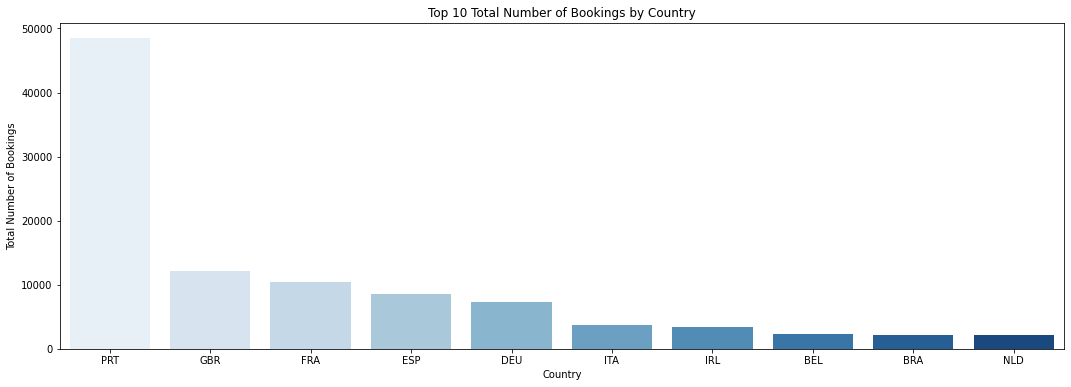

In [ ]:
total_booking_by_country = total_booking_by_country.sort_values(ascending = False, by = 'is_canceled').head(10)

plt.figure(figsize = (18, 6))
sns.barplot(x = total_booking_by_country['country'], y = total_booking_by_country['is_canceled'], palette = 'Blues')
plt.title('Top 10 Total Number of Bookings by Country')
plt.xlabel('Country')
plt.ylabel('Total Number of Bookings')

Text(0, 0.5, 'Percentage of Canceled Bookings')

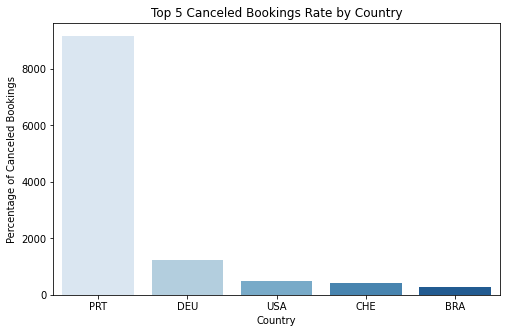

In [ ]:
plt.figure(figsize = (8, 5))
sns.barplot(x = canceled_rate['country'], y = canceled_rate['is_canceled'], palette = 'Blues')
plt.title('Top 5 Canceled Bookings Rate by Country')
plt.xlabel('Country')
plt.ylabel('Percentage of Canceled Bookings')

Text(0, 0.5, 'Percentage of Non-Canceled Bookings')

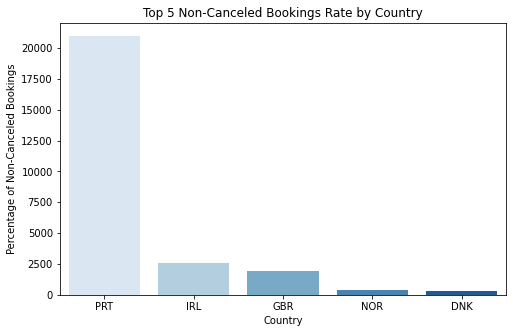

In [ ]:
plt.figure(figsize = (8, 5))
sns.barplot(x = not_canceled_rate['country'], y = not_canceled_rate['is_canceled'], palette = 'Blues')
plt.title('Top 5 Non-Canceled Bookings Rate by Country')
plt.xlabel('Country')
plt.ylabel('Percentage of Non-Canceled Bookings')

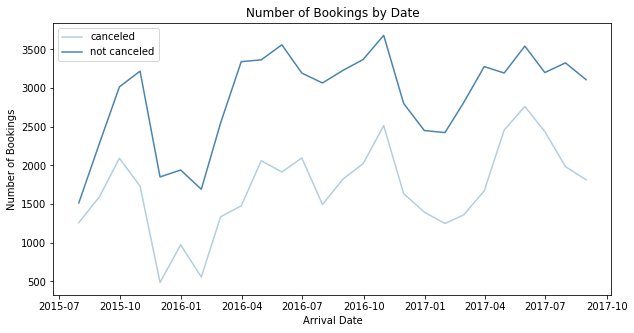

In [ ]:
# data hủy đặt phòng
canceled = hotel_bookings[hotel_bookings['is_canceled']==1][['arrival_date']]
canceled.set_index('arrival_date', inplace=True)
canceled['count'] = 1
canceled=canceled.resample('M').sum()

# data không hủy đặt phòng
not_canceled = hotel_bookings[hotel_bookings['is_canceled']==0][['arrival_date']]
not_canceled.set_index('arrival_date', inplace=True)
not_canceled['count'] = 1
not_canceled=not_canceled.resample('M').sum()

plt.figure(figsize=(10,5))
sns.lineplot(x=canceled.index, y=canceled['count'], color='#b3cede')
sns.lineplot(x=not_canceled.index, y=not_canceled['count'], color='#4884af')
plt.ylabel('Number of Bookings')
plt.xlabel('Arrival Date')
plt.title('Number of Bookings by Date')
plt.legend(['canceled', 'not canceled']);

## --

In [ ]:
lr_time_1 = []
knn_time_1 = []
tree_time_1 = []
nn_time_1 = []
lr_time_2 = []
knn_time_2 = []
tree_time_2 = []
nn_time_2 = []
lr_time_rest = []
knn_time_rest = []
tree_time_rest = []
nn_time_rest = []

## Huấn luyện mô hình lần 1

### Chuẩn bị dữ liệu chạy model

In [ ]:
data_dum = pd.get_dummies(hotel_bookings, columns = ['hotel', 'arrival_date_month', 'meal', 'market_segment', 'distribution_channel', 'country', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type'])

X = data_dum.drop(columns=['is_canceled','reservation_status', 'agent', 'company', 'reservation_status_date', 'arrival_date'])
y = data_dum['is_canceled']

X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X, y, random_state = 42, stratify=y, test_size = 0.2)

In [ ]:
pipeline = Pipeline([
            ('std_scaler',StandardScaler()),
                    ])
scaled_X_train_1 = pipeline.fit_transform(X_train_1)
scaled_X_test_1 = pipeline.fit_transform(X_test_1)

### Logistic Regression

In [ ]:
model_logistic = LogisticRegression()
start = time.time()
model_logistic.fit(scaled_X_train_1, y_train_1)
stop = time.time()
lr_time_1.append(stop - start)
print(f"Logistic Regression training time: {stop - start}s")

Logistic Regression training time: 5.254441261291504s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
lr_acc_1 = cross_val_score(model_logistic, scaled_X_train_1, y_train_1, scoring = 'f1_macro', cv=5).mean()
lr_acc_1

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


0.7968519401510619

###  K-nearest neighbors

In [ ]:
# huấn luyện mô hình KNN thuần túy
knn = KNeighborsClassifier()
start = time.time()
knn.fit(scaled_X_train_1, y_train_1)
stop = time.time()
knn_time_1.append(stop - start)
print(f"K-Nearest Neighbors training time: {stop - start}s")

K-Nearest Neighbors training time: 0.03225088119506836s


In [ ]:
# Đánh giá trên tập train
knn_acc_1 = cross_val_score(knn, scaled_X_train_1, y_train_1, scoring = 'f1_macro', cv=5).mean()
knn_acc_1

0.8186194535519563

### Decision Tree

In [ ]:
tree_clf = DecisionTreeClassifier(random_state = 20)
start = time.time()
tree_clf.fit(scaled_X_train_1, y_train_1)
stop = time.time()
tree_time_1.append(stop - start)
print(f"Decision Tree training time: {stop - start}s")

Decision Tree training time: 3.556441307067871s


In [ ]:
tree_acc_1 = cross_val_score(tree_clf, scaled_X_train_1, y_train_1, scoring = 'f1_macro', cv = 5).mean()
tree_acc_1

0.9271916015501557

### Neural Networks

In [ ]:
model_neural = MLPClassifier(random_state=20, max_iter=500)
start = time.time()
model_neural.fit(scaled_X_train_1, y_train_1)
stop = time.time()
nn_time_1.append(stop - start)
print(f"Neural Network training time: {stop - start}s")

Neural Network training time: 316.4924738407135s


In [ ]:
nn_acc_1 = cross_val_score(model_neural, scaled_X_train_1, y_train_1, scoring = 'f1_macro', cv = 5).mean()
nn_acc_1

0.9607492222502453

## Huấn luyện mô hình lần 2

### Chọn ra thuộc tính quan trọng bằng phương pháp Random Forest Importance

In [ ]:
model = RandomForestClassifier()
model.fit(X, y)
importances = model.feature_importances_

final_df = pd.DataFrame({'Features': pd.DataFrame(X).columns, 'Importances': importances})
#final_df.set_index('Importances')

final_df = final_df.sort_values('Importances').tail(30)

In [ ]:
final_df.tail(10)

,Features,Importances
3,arrival_date_day_of_month,0.034310
19,price_per_guest,0.043134
14,adr,0.045246
16,total_of_special_requests,0.046074
5,stays_in_week_nights,0.049168
250,deposit_type_Non Refund,0.050479
186,country_PRT,0.058496
249,deposit_type_No Deposit,0.067821
0,lead_time,0.086364
17,status_minus_arrival_date,0.108952


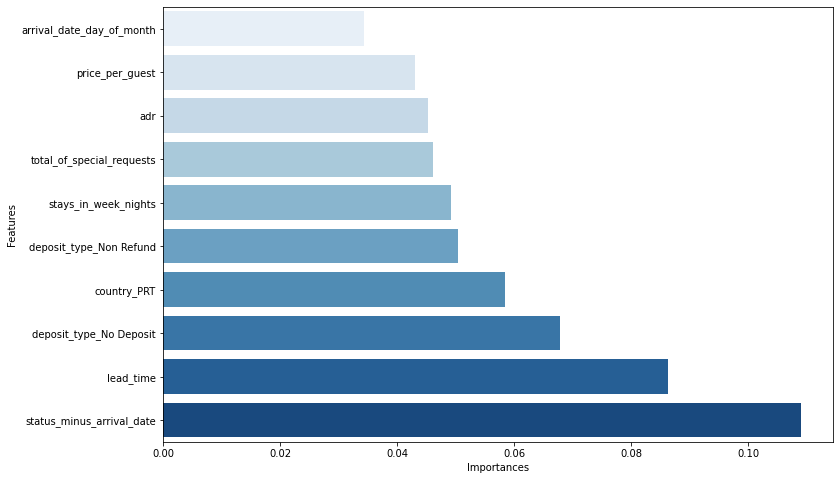

In [ ]:
plt.figure(figsize = (12, 8))
df = final_df.tail(10)
sns.barplot(x = df['Importances'], y = df['Features'], palette = 'Blues', orient = 'h')

In [ ]:
selected_columns = np.array(final_df['Features'])

X_rest = X.drop(selected_columns, axis = 1)
X = X[selected_columns]
#X_rest = X_rest.drop(['is_canceled','reservation_status', 'agent', 'company', 'reservation_status_date', 'arrival_date'], axis = 1)

### Chuẩn bị dữ liệu

In [ ]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X, y, random_state = 42, stratify=y, test_size = 0.2)
X_rest_train, X_rest_test, y_rest_train, y__rest_test = train_test_split(X_rest, y, random_state = 42, stratify=y, test_size = 0.2)

In [ ]:
pipeline = Pipeline([
            ('std_scaler',StandardScaler()),
                    ])
scaled_X_train_2 = pipeline.fit_transform(X_train_2)
scaled_X_test_2 = pipeline.fit_transform(X_test_2)

scaled_X_rest_train = pipeline.fit_transform(X_rest_train)
scaled_X_rest_test = pipeline.fit_transform(X_rest_test)

### Logistic Regression

- Chạy mô hình trên các thuộc tính quan trọng

In [ ]:
model_logistic = LogisticRegression(solver='liblinear')
start = time.time()
model_logistic.fit(scaled_X_train_2, y_train_2)
stop = time.time()
lr_time_2.append(stop - start)
print(f"Logistic Regression training time: {stop - start}s")

Logistic Regression training time: 2.9919886589050293s


In [ ]:
lr_acc_2 = cross_val_score(model_logistic, scaled_X_train_2, y_train_2, scoring = 'f1_macro', cv=5).mean()
lr_acc_2

0.7771944028913637

- Chạy mô hình trên các thuộc tính còn lại

In [ ]:
model_logistic_rest = LogisticRegression(solver='liblinear')
start = time.time()
model_logistic_rest.fit(scaled_X_rest_train, y_rest_train)
stop = time.time()
lr_time_rest.append(stop - start)
print(f"Logistic Regression training time: {stop - start}s")

Logistic Regression training time: 12.274916172027588s


In [ ]:
lr_acc_rest = cross_val_score(model_logistic_rest, scaled_X_rest_train, y_rest_train, scoring = 'f1_macro', cv=5).mean()
lr_acc_rest

0.6513134161241765

### K-nearest Neighbors

- Chạy mô hình trên các thuộc tính quan trọng

In [ ]:
knn_lan2 = KNeighborsClassifier()
start = time.time()
knn_lan2.fit(scaled_X_train_2, y_train_2)
stop = time.time()
knn_time_2.append(stop - start)
print(f"K-Nearest Neighbors training time: {stop - start}s")

K-Nearest Neighbors training time: 0.013478755950927734s


In [ ]:
# đánh giá dữ liệu trên tập train dựa vào k-fold cross
knn_acc_2 = cross_val_score(knn_lan2, scaled_X_train_2, y_train_2, scoring = 'f1_macro', cv=5).mean()
knn_acc_2

0.8720877963811284

- Chạy mô hình trên các thuộc tính còn lại

In [ ]:
knn_lan2_rest = KNeighborsClassifier()
start = time.time()
knn_lan2_rest.fit(scaled_X_rest_train, y_rest_train)
stop = time.time()
knn_time_rest.append(stop - start)
print(f"K-Nearest Neighbors training time: {stop - start}s")

K-Nearest Neighbors training time: 0.024804115295410156s


In [ ]:
knn_acc_rest = cross_val_score(knn_lan2_rest, scaled_X_rest_train, y_rest_train, scoring = 'f1_macro', cv=5).mean()
knn_acc_rest

0.6522099001636041

### Decision Tree

- Chạy mô hình trên các thuộc tính quan trọng

In [ ]:
tree_clf = DecisionTreeClassifier(random_state = 20)
start = time.time()
tree_clf.fit(scaled_X_train_2, y_train_2)
stop = time.time()
tree_time_2.append(stop - start)
print(f"Decision Tree training time: {stop - start}s")

Decision Tree training time: 0.851569652557373s


In [ ]:
tree_acc_2 = cross_val_score(tree_clf, scaled_X_train_2, y_train_2, scoring = 'f1_macro', cv = 5).mean()
tree_acc_2

0.9285779395153263

- Chạy mô hình trên các thuộc tính còn lại

In [ ]:
tree_clf_rest = DecisionTreeClassifier(random_state = 20)
start = time.time()
tree_clf_rest.fit(scaled_X_rest_train, y_rest_train)
stop = time.time()
tree_time_rest.append(stop - start)
print(f"Decision Tree training time: {stop - start}s")

Decision Tree training time: 3.6059818267822266s


In [ ]:
tree_acc_rest = cross_val_score(tree_clf_rest, scaled_X_rest_train, y_rest_train, scoring = 'f1_macro', cv = 5).mean()
tree_acc_rest

0.6813510683980422

### Neural Network

- Chạy mô hình trên các thuộc tính quan trọng

In [ ]:
model_neural = MLPClassifier(random_state=20, max_iter=500)
start = time.time()
model_neural.fit(scaled_X_train_2, y_train_2)
stop = time.time()
nn_time_2.append(stop - start)
print(f"Neural Network training time: {stop - start}s")

Neural Network training time: 148.0031771659851s


In [ ]:
nn_acc_2 = cross_val_score(model_neural, scaled_X_train_2, y_train_2, scoring = 'f1_macro', cv = 5).mean()
nn_acc_2

0.9693650312845646

- Chạy mô hình trên các thuộc tính còn lại

In [ ]:
model_neural_rest = MLPClassifier(random_state=20, max_iter=500)
start = time.time()
model_neural_rest.fit(scaled_X_rest_train, y_rest_train)
stop = time.time()
nn_time_rest.append(stop - start)
print(f"Neural Network training time: {stop - start}s")

Neural Network training time: 427.7671465873718s


In [ ]:
nn_acc_rest = cross_val_score(model_neural_rest, scaled_X_rest_train, y_rest_train, scoring = 'f1_macro', cv = 5).mean()
nn_acc_rest

0.6874985266939453

### Có phải 9 thuộc tính được chọn thực sự ảnh hưởng đến khả năng hủy đặt phòng của khách hàng hay không?

In [ ]:
columns = {
    'model':['Logistic Regression', 'Logistic Regression', 'Logistic Regression', 'K-Nearest Neighbors', 'K-Nearest Neighbors', 
             'K-Nearest Neighbors', 'Decision Tree', 'Decision Tree', 'Decision Tree', 'Neural Network', 'Neural Network', 'Neural Network'],
    'dataset':['Full', 'Important', 'Rest', 'Full', 'Important', 'Rest', 'Full', 'Important', 'Rest', 'Full', 'Important', 'Rest'],
    'f1_score':[lr_acc_1, lr_acc_2, lr_acc_rest, knn_acc_1, knn_acc_2, knn_acc_rest, tree_acc_1, tree_acc_2, tree_acc_rest, 
                      nn_acc_1, nn_acc_2, nn_acc_rest],
    'time':[np.array(lr_time_1).mean(), np.array(lr_time_2).mean(), np.array(lr_time_rest).mean(), np.array(knn_time_1).mean(), 
            np.array(knn_time_2).mean(), np.array(knn_time_rest).mean(), np.array(tree_time_1).mean(), 
            np.array(tree_time_2).mean(), np.array(tree_time_rest).mean(), np.array(nn_time_1).mean(), np.array(nn_time_2).mean(), 
            np.array(nn_time_rest).mean()]
}
df = pd.DataFrame(columns)
df

,model,dataset,accuracy_score,time
0,Logistic Regression,Full,0.796852,5.331134
1,Logistic Regression,Important,0.777194,3.014467
2,Logistic Regression,Rest,0.651313,12.346568
3,K-Nearest Neighbors,Full,0.818619,0.031029
4,K-Nearest Neighbors,Important,0.872088,0.013292
5,K-Nearest Neighbors,Rest,0.652210,0.027340
6,Decision Tree,Full,0.927192,3.409228
7,Decision Tree,Important,0.928578,0.860078
8,Decision Tree,Rest,0.681351,3.586171
9,Neural Network,Full,0.960749,323.229544


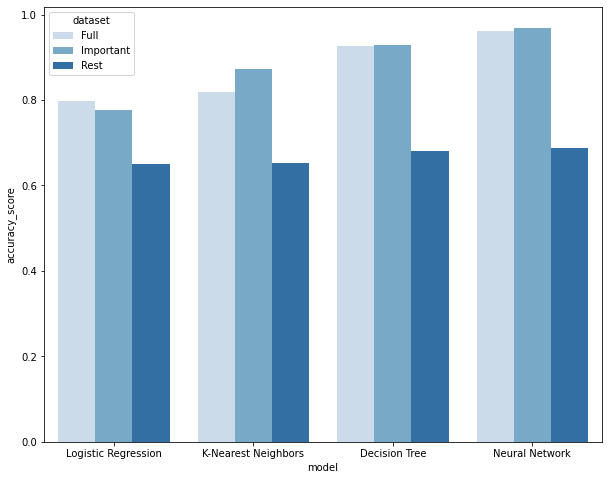

In [ ]:
plt.figure(figsize=(10, 8))
sns.barplot(x="model", y="accuracy_score", hue="dataset", data=df, ci=None, palette = 'Blues')

## Đánh giá mô hình

- Sử dụng độ đo f1 thay vì accuracy để đánh giá do bộ dữ liệu bị mất cân bằng
- So sánh auc

In [ ]:
# Logistic Regression
y_pred_lr = model_logistic.predict(scaled_X_test_2)
lr_f1 = f1_score(y_test_2, y_pred_lr, average = 'macro')

lr_fpr, lr_tpr, lr_thres = roc_curve(y_test_2, y_pred_lr)
lr_auc = auc(lr_fpr, lr_tpr)
print(classification_report(y_test_2, y_pred_lr))

              precision    recall  f1-score   support

           0       0.80      0.91      0.85     15003
           1       0.80      0.63      0.70      8839

    accuracy                           0.80     23842
   macro avg       0.80      0.77      0.78     23842
weighted avg       0.80      0.80      0.80     23842



In [ ]:
# K-Nearest Neighbors
y_pred_knn = knn_lan2.predict(scaled_X_test_2)
knn_f1 = f1_score(y_test_2, y_pred_knn, average = 'macro')

knn_fpr, knn_tpr, knn_thres = roc_curve(y_test_2, y_pred_knn)
knn_auc = auc(knn_fpr, knn_tpr)
print(classification_report(y_test_2, y_pred_knn))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91     15003
           1       0.89      0.79      0.84      8839

    accuracy                           0.88     23842
   macro avg       0.89      0.86      0.87     23842
weighted avg       0.89      0.88      0.88     23842



In [ ]:
# Decision Tree
y_pred_tree = tree_clf.predict(scaled_X_test_2)
tree_f1 = f1_score(y_test_2, y_pred_tree, average = 'macro')

tree_fpr, tree_tpr, tree_thres = roc_curve(y_test_2, y_pred_tree)
tree_auc = auc(tree_fpr, tree_tpr)
print(classification_report(y_test_2, y_pred_tree))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94     15003
           1       0.89      0.91      0.90      8839

    accuracy                           0.92     23842
   macro avg       0.92      0.92      0.92     23842
weighted avg       0.93      0.92      0.93     23842



In [ ]:
# Neural Network
y_pred_nn = model_neural.predict(scaled_X_test_2)
nn_f1 = f1_score(y_test_2, y_pred_nn, average = 'macro')

nn_fpr, nn_tpr, nn_thres = roc_curve(y_test_2, y_pred_nn)
nn_auc = auc(nn_fpr, nn_tpr)
print(classification_report(y_test_2, y_pred_nn))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     15003
           1       0.98      0.94      0.96      8839

    accuracy                           0.97     23842
   macro avg       0.97      0.97      0.97     23842
weighted avg       0.97      0.97      0.97     23842



In [ ]:
columns = {
    'model':['Logistic Regression', 'Logistic Regression', 'K-Nearest Neighbors', 'K-Nearest Neighbors', 'Decision Tree', 'Decision Tree', 'Neural Network', 'Neural Network'],
    'metrics':['F1 score', 'Area under curve', 'F1 score', 'Area under curve', 'F1 score', 'Area under curve', 'F1 score', 'Area under curve'],
    'score':[lr_f1, lr_auc, knn_f1, knn_auc, tree_f1, tree_auc, nn_f1, nn_auc]
}
df = pd.DataFrame(columns)
df

,model,metrics,score
0,Logistic Regression,F1 score,0.777177
1,Logistic Regression,Area under curve,0.766493
2,K-Nearest Neighbors,F1 score,0.873381
3,K-Nearest Neighbors,Area under curve,0.864802
4,Decision Tree,F1 score,0.919828
5,Decision Tree,Area under curve,0.921089
6,Neural Network,F1 score,0.968865
7,Neural Network,Area under curve,0.965753


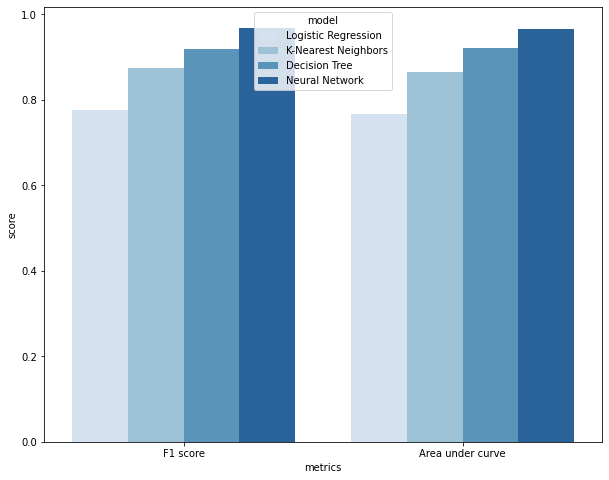

In [ ]:
plt.figure(figsize=(10, 8))
sns.barplot(x="metrics", y="score", hue="model", data=df, ci=None, palette = 'Blues');

Trong 4 mô hình thử nghiệm, Neural Network có khả năng phân loại tốt nhất với f1 score là 96.9% và phần diện tích gạch chéo nằm dưới đường cong ROC là 0.966.

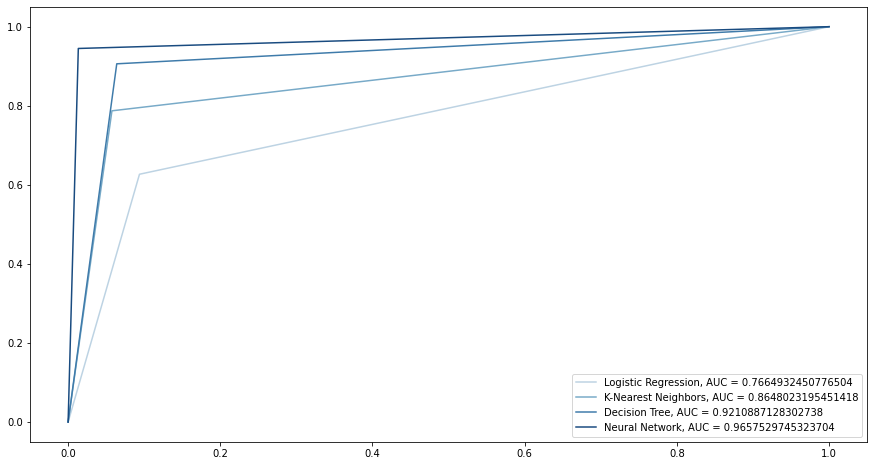

In [ ]:
plt.figure(figsize=(15, 8))
plt.plot(lr_fpr,lr_tpr,label="Logistic Regression, AUC = "+str(lr_auc), color = '#bdd3e3')
plt.plot(knn_fpr,knn_tpr,label="K-Nearest Neighbors, AUC = "+str(knn_auc), color = '#78aac8')
plt.plot(tree_fpr,tree_tpr,label="Decision Tree, AUC = "+str(tree_auc), color = '#3f7baa')
plt.plot(nn_fpr,nn_tpr,label="Neural Network, AUC = "+str(nn_auc), color = '#194b80')
plt.legend()

## Tinh chỉnh mô hình

In [ ]:
mlpc_parameters = {"hidden_layer_sizes": [(50,50,50),
                                          (100,100)],
                   "alpha": [1, 0.1]}

model_neural = MLPClassifier()
model_neural_grid = GridSearchCV(model_neural, mlpc_parameters, scoring = 'f1_macro',
                             cv = 5,
                             n_jobs = -1,
                             verbose = 2)
model_neural = model_neural_grid.fit(scaled_X_train_2, y_train_2)
print('Best Parameters using Grid Search: \n', model_neural_grid.best_params_)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best Parameters using Grid Search: 
 {'alpha': 0.1, 'hidden_layer_sizes': (50, 50, 50)}


In [ ]:
grid_results = pd.DataFrame(model_neural_grid.cv_results_)
grid_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_hidden_layer_sizes,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,75.648946,15.295558,0.094237,0.014239,1,"(50, 50, 50)","{'alpha': 1, 'hidden_layer_sizes': (50, 50, 50)}",0.966365,0.967402,0.968470,0.967866,0.964870,0.966995,0.001266,3
1,74.984978,12.895264,0.125651,0.027205,1,"(100, 100)","{'alpha': 1, 'hidden_layer_sizes': (100, 100)}",0.962486,0.966766,0.965755,0.961398,0.960564,0.963394,0.002440,4
2,151.438883,23.625555,0.160358,0.017416,0.1,"(50, 50, 50)","{'alpha': 0.1, 'hidden_layer_sizes': (50, 50, ...",0.969868,0.971186,0.972504,0.970013,0.970358,0.970786,0.000973,1
3,186.128705,28.817067,0.206955,0.034400,0.1,"(100, 100)","{'alpha': 0.1, 'hidden_layer_sizes': (100, 100)}",0.970075,0.970678,0.972654,0.967898,0.969924,0.970246,0.001525,2


In [ ]:
nn_train_acc = model_neural.score(scaled_X_train_2, y_train_2)
nn_test_acc = model_neural.score(scaled_X_test_2, y_test_2)
nn_cv_acc = cross_val_score(model_neural.best_estimator_, scaled_X_train_2, y_train_2, cv=5).mean()
print(f'Best Training f1 score: {nn_train_acc}')
print(f'Best Testing f1 score: {nn_test_acc}')
print(f'Cross-val-score: {nn_cv_acc}')

Best Training f1 score: 0.9745205578391842
Best Testing f1 score: 0.9687931796260842
Cross-val-score: 0.9727570028980846


Mô hình không bị overfit hay underfit vì độ chính xác trên tập train xấp xỉ độ chính xác trên tập test (97%)

## Phân tích lỗi

Sử dụng kết quả dự đoán của mô hình Neural Network để phân tích lỗi

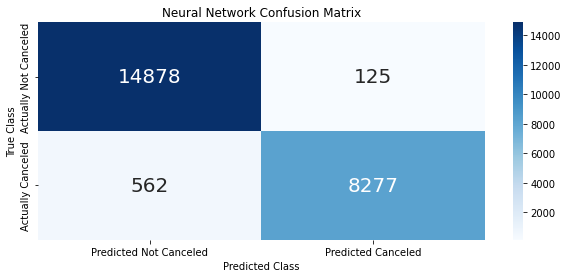

In [ ]:
y_pred_nn = model_neural.predict(scaled_X_test_2)

cm = confusion_matrix(y_test_2, y_pred_nn)
cm_df = pd.DataFrame(cm, index=['Actually Not Canceled', 'Actually Canceled'],
                 columns=['Predicted Not Canceled', 'Predicted Canceled'])

plt.figure(figsize=(10,4))
    
sns.heatmap(cm, annot=True, fmt='g', cmap="Blues",xticklabels=cm_df.columns, yticklabels=cm_df.index, annot_kws={"size": 20})
plt.title("Neural Network Confusion Matrix")
plt.xlabel('Predicted Class')
plt.ylabel('True Class');

In [ ]:
print(classification_report(y_test_2, y_pred_nn))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98     15003
           1       0.99      0.94      0.96      8839

    accuracy                           0.97     23842
   macro avg       0.97      0.96      0.97     23842
weighted avg       0.97      0.97      0.97     23842



Nhìn chung, mô hình phân loại đúng 97% lượt đặt phòng. Trong đó, mô hình dự đoán đúng 99% lượt đặt phòng không bị hủy và 94% lượt hủy phòng. Nếu mô hình dự đoán 1 lượt đặt phòng không bị hủy thì lượt đặt phòng đó thực sự không bị hủy với xác suất 96%. Còn nếu mô hình dự đoán lượt đặt phòng đó sẽ bị hủy, thì 99% là dự đoán đó chính xác.

Dựa trên ma trận nhầm lẫn, có 125 lượt đặt phòng được dự đoán là bị hủy trong khi thực chất nó không hề bị hủy. Sự sai lầm này khiến cho nhân viên khách sạn chưa thực sự sẵn sàng để đón khách hoặc trong trường hợp xấu hơn, phòng sẽ bị chuyển qua cho khách khác. Có 562 lượt đặt phòng được dự đoán là không bị hủy trong khi thực chất nó bị hủy. Dự đoán sai sẽ gây lãng phí nguồn lực khách sạn và bị mất một số khách khác.

In [ ]:
analysis = pd.DataFrame(y_test_2)
analysis['prediction'] = y_pred_nn
prediction_analysis = pd.merge(left=analysis, right=hotel_bookings.drop('is_canceled', axis = 1).loc[np.array(y_test_2.index), :], on=analysis.index)

# Một số dự đoán nhầm lẫn 
prediction_analysis = prediction_analysis[prediction_analysis['is_canceled'] != prediction_analysis['prediction']]
prediction_analysis[prediction_analysis['is_canceled'] == 1].sample(n = 5)[['is_canceled', 'prediction', 'previous_cancellations', 
                                                                            'required_car_parking_spaces','booking_changes', 
                                                                            'total_of_special_requests']]

,is_canceled,prediction,previous_cancellations,required_car_parking_spaces,booking_changes,total_of_special_requests
1676,1,0,0,0,0,2
12474,1,0,0,0,2,0
3667,1,0,0,0,0,1
20879,1,0,0,0,0,1
22806,1,0,0,0,0,0


Những lượt đặt phòng trên có lịch sử hủy phòng bằng 0. Thông thường nếu số lần đã từng hủy phòng càng ít thì khả năng hủy phòng lần này không cao, vì thế nên mô hình đã dự đoán nhầm thành 0 (không hủy) thay vì 1 (hủy).

In [ ]:
prediction_analysis[prediction_analysis['is_canceled'] == 0].sample(n = 5)[['is_canceled', 'prediction', 'previous_cancellations', 
                                                                            'required_car_parking_spaces','booking_changes', 
                                                                            'total_of_special_requests']]

,is_canceled,prediction,previous_cancellations,required_car_parking_spaces,booking_changes,total_of_special_requests
5290,0,1,0,0,0,0
333,0,1,0,0,0,1
9896,0,1,0,0,0,2
8514,0,1,0,0,2,1
18913,0,1,0,0,0,0


Dựa trên số yêu cầu đặc biệt, yêu cầu về chỗ đậu xe và số lần thay đổi thông tin đặt phòng bằng 0, mô hình sẽ có xu hướng dự đoán lượt này bị hủy trong khi thực chất nó không bị hủy.